# SF Salaries Exercise 


Bem-vindo a um rápido exercício para você praticar suas habilidades de pandas! Estaremos usando o [SF Salaries Dataset] (https://www.kaggle.com/kaggle/sf-salaries) do Kaggle! Basta acompanhar e concluir as tarefas descritas em negrito abaixo.

**Importe pandas como pd.**

In [35]:
import pandas as pd
import seaborn as sns

**Ler Salaries.csv como um  dataframe chamado sal.**

In [2]:
sal = pd.read_csv('Salaries.csv')

**Verifique o cabeçalho do DataFrame.**

In [6]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use o método .info () para descobrir quantas entradas existem.**

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**Qual é o BasePay médio?**

In [5]:
sal['BasePay'].mean()

66325.44884050643

**Qual é a maior quantidade de OvertimePay no conjunto de dados?**

In [9]:
sal['OvertimePay'].max()

245131.88

**Qual é o cargo de JOSEPH DRISCOLL? Observação: use todas as letras maiúsculas, caso contrário, você pode obter uma resposta que não corresponde (há também Joseph Driscoll em minúsculas).**

In [7]:
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

**Quanto JOSEPH DRISCOLL ganha (incluindo benefícios)?**

In [8]:
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

**Qual é o nome da pessoa mais bem paga (incluindo benefícios)?**

In [9]:
sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


**Qual é o nome da pessoa com menor remuneração (incluindo benefícios)? Você percebe algo estranho sobre quanto ele ou ela recebe?**

In [26]:
sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,LenJobTitle
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN,26


**Qual foi a média (média) BasePay de todos os funcionários por ano? (2011-2014)?**

In [11]:
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**Quantos cargos exclusivos existem?**

In [13]:
sal['JobTitle'].nunique()

2159

**Quais são os 5 principais empregos mais comuns?**

In [15]:
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**Quantos cargos foram representados por apenas uma pessoa em 2013? (por exemplo, cargos com apenas uma ocorrência em 2013?)**

In [16]:
sum(sal[sal['Year']==2013]['JobTitle'].value_counts()==1)

202

**Quantas pessoas têm a palavra chefe no cargo? (Isso é muito complicado)**

In [33]:
sum(sal['JobTitle'].str.contains("chief",case=False)) #case insensitive

627

In [31]:
sum(sal['JobTitle'].str.contains("Chief")) #case sensitive

423

**Bônus: há uma correlação entre o comprimento da sequência do Título do Trabalho e o Salário?**

In [36]:
sal['LenJobTitle'] = sal['JobTitle'].str.len()
sal[['LenJobTitle','TotalPayBenefits']].corr()

,LenJobTitle,TotalPayBenefits
LenJobTitle,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


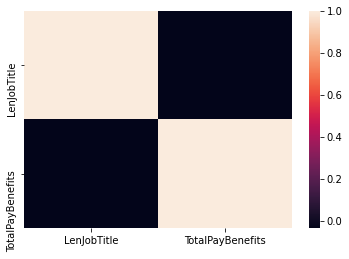

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(sal[['LenJobTitle','TotalPayBenefits']].corr())
plt.show()